Equal Frequency Binning: [[5, 10, 11, 13], [15, 35, 50, 55], [72, 92, 204, 215]]

Equal Width Binning: [[5, 10, 11, 13, 15, 35, 50, 55, 72], [92], [204, 215]]


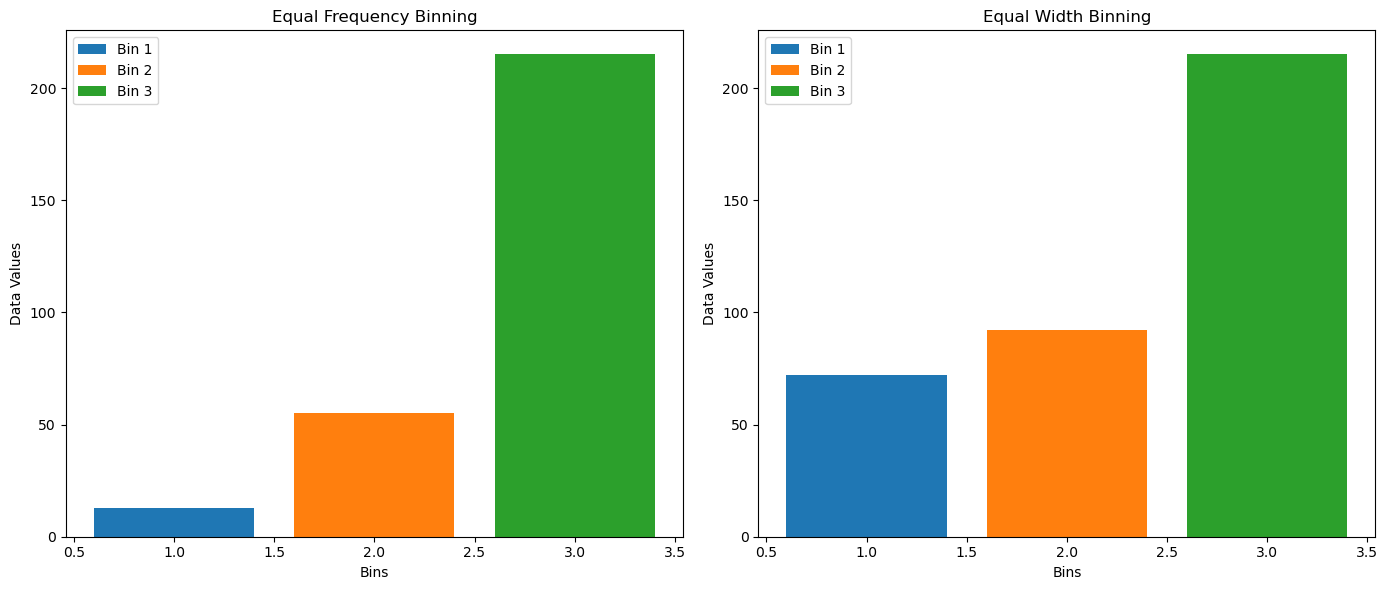

In [7]:
import matplotlib.pyplot as plt

# Equal frequency binning function
def equifreq(arr1, m):    
    a = len(arr1)
    n = int(a / m)
    bins = []
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        bins.append(arr)
    return bins

# Equal width binning function
def equiwidth(arr1, m):
    a = len(arr1)
    w = int((max(arr1) - min(arr1)) / m)
    min1 = min(arr1)
    arr = [min1 + w * i for i in range(0, m + 1)]
    bins = []
    for i in range(0, m):
        temp = [j for j in arr1 if arr[i] <= j <= arr[i + 1]]
        bins.append(temp)
    return bins, arr

# Data to be binned
data = [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
m = 3

# Perform binning
freq_bins = equifreq(data, m)
width_bins, width_intervals = equiwidth(data, m)

# Print binning results
print("Equal Frequency Binning:", freq_bins)
print("\nEqual Width Binning:", width_bins)

# Plotting the bins
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Equal Frequency Binning
for i, bin_data in enumerate(freq_bins):
    axes[0].bar([i + 1] * len(bin_data), bin_data, label=f'Bin {i+1}')
axes[0].set_title("Equal Frequency Binning")
axes[0].set_xlabel("Bins")
axes[0].set_ylabel("Data Values")
axes[0].legend()

# Equal Width Binning
for i, bin_data in enumerate(width_bins):
    axes[1].bar([i + 1] * len(bin_data), bin_data, label=f'Bin {i+1}')
axes[1].set_title("Equal Width Binning")
axes[1].set_xlabel("Bins")
axes[1].set_ylabel("Data Values")
axes[1].legend()

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import numpy as np
from statsmodels.datasets import get_rdataset

# Load the Boston Housing dataset
boston = get_rdataset('Boston', 'MASS')
boston_df = boston.data

# Selecting the 'AGE' column for operations
data_column = 'age'

# Define a function for equal width binning
def equal_width_binning(data, num_bins):
 bin_edges = np.linspace(data.min(), data.max(), num_bins + 1)
 bins = np.digitize(data, bin_edges)
 return bins, bin_edges

# Define a function for equal frequency binning
def equal_freq_binning(data, num_bins):
 bins = pd.qcut(data, num_bins, labels=False)
 return bins, None

# Define a function for data smoothing by bin mean
def bin_mean_smoothing(data, bins):
 bin_means = data.groupby(bins).mean()
 smoothed_data = bin_means[bins].values
 return smoothed_data

# Define a function for data smoothing by bin median
def bin_median_smoothing(data, bins):
 bin_medians = data.groupby(bins).median()
 smoothed_data = bin_medians[bins].values
 return smoothed_data

# Define a function for data smoothing by bin boundaries
def bin_boundary_smoothing(data, bins):
 bin_boundaries = pd.cut(data, bins=bins, right=False)
 smoothed_data = bin_boundaries.apply(lambda x: x.left).values
 return smoothed_data

# Perform equal width binning on 'AGE' column
num_bins = 2
boston_df['AGE_equal_width_bins'], _ = equal_width_binning(boston_df[data_column],
num_bins)

# Perform equal frequency binning on 'AGE' column
boston_df['AGE_equal_freq_bins'], _ = equal_freq_binning(boston_df[data_column],
num_bins)

# Data smoothing by bin mean on 'AGE' column
boston_df['AGE_smoothed_mean'] = bin_mean_smoothing(boston_df[data_column],
boston_df['AGE_equal_width_bins'])

# Data smoothing by bin median on 'AGE' column
boston_df['AGE_smoothed_median'] = bin_median_smoothing(boston_df[data_column],
boston_df['AGE_equal_width_bins'])

# Data smoothing by bin boundaries on 'AGE' column
boston_df['AGE_smoothed_boundary'] = bin_boundary_smoothing(boston_df[data_column],
np.linspace(boston_df[data_column].min(), boston_df[data_column].max(), num_bins +
1))

# Display the resulting DataFrame
display(boston_df[[data_column, 'AGE_equal_width_bins', 'AGE_equal_freq_bins',
'AGE_smoothed_mean', 'AGE_smoothed_median', 'AGE_smoothed_boundary']].head(20)) 

,age,AGE_equal_width_bins,AGE_equal_freq_bins,AGE_smoothed_mean,AGE_smoothed_median,AGE_smoothed_boundary
0,65.2,2,0,82.190159,86.30,51.45
1,78.9,2,1,82.190159,86.30,51.45
2,61.1,2,0,82.190159,86.30,51.45
3,45.8,1,0,30.466216,32.05,2.90
4,54.2,2,0,82.190159,86.30,51.45
5,58.7,2,0,82.190159,86.30,51.45
6,66.6,2,0,82.190159,86.30,51.45
7,96.1,2,1,82.190159,86.30,51.45
8,100.0,3,1,100.000000,100.00,NaN
9,85.9,2,1,82.190159,86.30,51.45
